In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import (iplot, download_plotlyjs, init_notebook_mode,plot)
init_notebook_mode(connected= True)
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

# USER ACQUISITION BY CHANNEL DATASET ANALYSIS

In [2]:
user_acq_channel = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\UserAcquisition_by_ChannelGroup.csv")
user_acq_channel

,First_user_primary_channel_group (Default_channel_group),Total_users,New_users,Returning_users,Average_engagement_time_per_active_user,Engaged_sessions_per_active_user,Event_count,Key_events,User_key_event_rate
0,Direct,34599,34099,1573,17.276492,0.439987,158678,13665,0.150740
1,Organic Social,30128,29876,534,6.665162,0.227496,111952,1662,0.026487
2,Organic Search,6560,6564,1320,111.103963,1.313567,72682,14911,0.554573
3,Paid Other,1376,1375,11,4.053779,0.976017,4988,1617,0.952035
4,Paid Search,1089,1087,59,16.255280,0.874197,5069,1140,0.700643
5,Paid Video,644,643,40,15.032609,0.869565,2711,571,0.697205
6,Cross-network,582,581,23,2.082474,1.037801,2605,781,1.000000
7,Referral,365,360,68,62.389041,1.158904,2742,605,0.673973
8,Display,330,330,18,20.960606,0.393939,1882,0,0.000000
9,Paid Social,104,104,2,19.240385,1.028846,359,117,1.000000


In [3]:
import plotly.express as px

In [4]:
user_acq_channel.columns.tolist()

['First_user_primary_channel_group (Default_channel_group)',
 'Total_users',
 'New_users',
 'Returning_users',
 'Average_engagement_time_per_active_user',
 'Engaged_sessions_per_active_user',
 'Event_count',
 'Key_events',
 'User_key_event_rate']

## 1. CHANNEL THAT BRINGS MOST USERS

In [5]:
users = user_acq_channel.sort_values(by= 'Total_users', ascending= False)

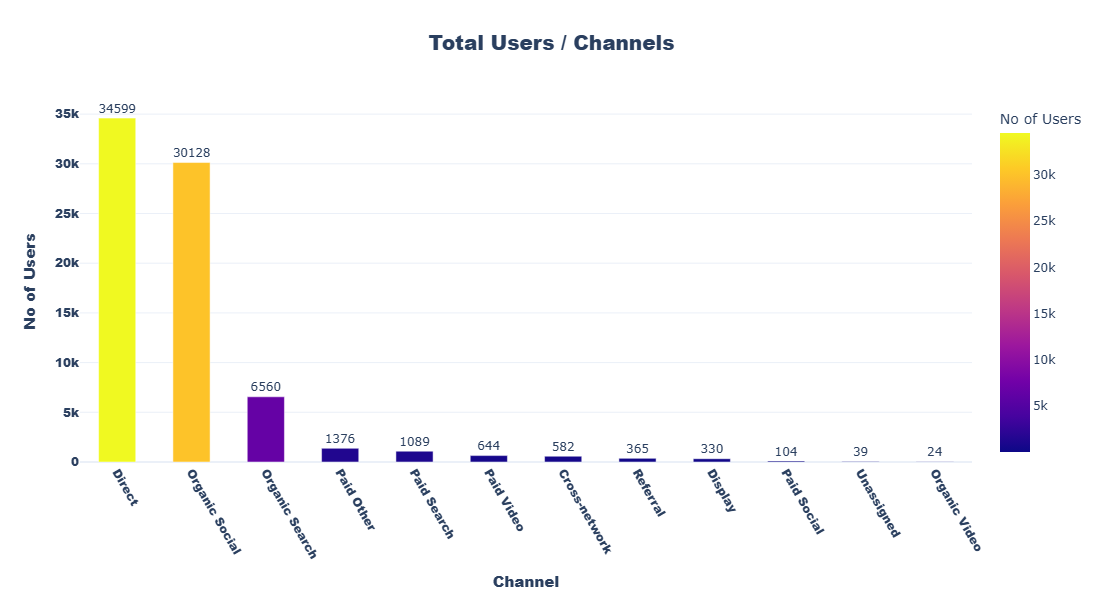

In [6]:
fig1 = px.bar(users,
              x= 'First_user_primary_channel_group (Default_channel_group)',
              y= 'Total_users',
              color= 'Total_users',
              text= 'Total_users',
              title= 'Total Users / Channels',
              labels= {'First_user_primary_channel_group (Default_channel_group)' : 'Channel',
                       'Total_users' : 'No of Users'},
              template= 'plotly_white',
              height= 600
             )

fig1.update_traces(textposition= 'outside', width= 0.5)

fig1.update_layout(title= {'text': "<b>Total Users / Channels<b> ",
                           'font': dict(family= "Arial Black", size= 20, color= 'Dark Blue'),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }, 
                  )

fig1.update_xaxes(tickangle= 60, 
                  tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15)
                 )

fig1.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15))

fig1.show()

## 2. CHANNELS THAT HAS MORE ENGAGEMENT TIME AMONG USERS

In [7]:
engagement = user_acq_channel.sort_values(by= 'Average_engagement_time_per_active_user', ascending= True)

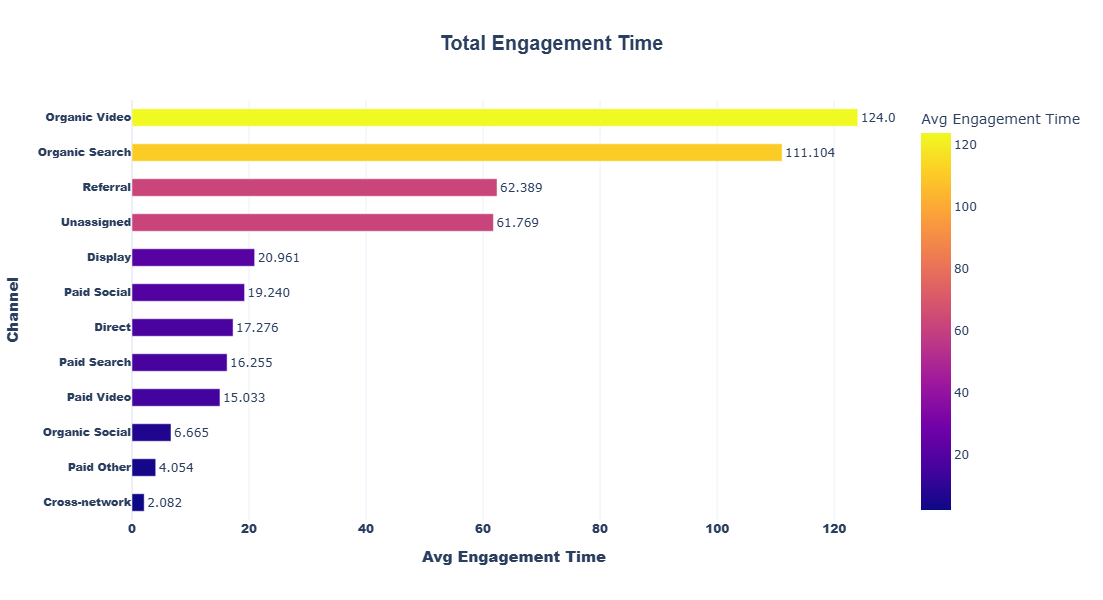

In [8]:
fig2 = px.bar(engagement, 
              x= 'Average_engagement_time_per_active_user', 
              y= 'First_user_primary_channel_group (Default_channel_group)',
              orientation= 'h',
              color= 'Average_engagement_time_per_active_user',
              text= 'Average_engagement_time_per_active_user',
              title= 'Avg Engagement Time / Channel',
              labels= {'First_user_primary_channel_group (Default_channel_group)' : 'Channel', 
                       'Average_engagement_time_per_active_user' : 'Avg Engagement Time'},
              template= 'plotly_white',
              height= 600
             )

fig2.update_traces(textposition= 'outside', width= 0.5, texttemplate= '%{x:.3f}')

fig2.update_layout(title= {'text' : '<b>Total Engagement Time<b>',
                           'font' : dict(family= "sans-serif", size= 20, color= "Dark Blue"),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }
                  )

fig2.update_xaxes( 
                  tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15),
                 )


fig2.update_yaxes(title_font= dict(family= "Arial Black", size= 15),
                 tickfont= dict(family= "Arial Black", size= 11)
                 )

fig2.show()

## 3. CHANNELS WITH BEST CONVERSION RATE

In [9]:
conversions = user_acq_channel.sort_values(by= 'User_key_event_rate', ascending= True)

In [10]:
fig3 = px.bar(conversions,
              x= 'User_key_event_rate',
              y= 'First_user_primary_channel_group (Default_channel_group)',
              title= 'Channels with most lead generation',
              template= 'plotly_white',
              labels= {'User_key_event_rate' : 'Conversion rate', 
                       'First_user_primary_channel_group (Default_channel_group)' : 'Channels'},
              orientation= 'h',
              height= 600
             )

fig3.update_traces(marker_color= 'blue',
                   width= 0.15)

fig_dot = px.scatter(conversions,
                     x= 'User_key_event_rate',
                     y= 'First_user_primary_channel_group (Default_channel_group)',
                     text= 'User_key_event_rate'
                    )

fig3.add_traces(fig_dot.data)

fig3.update_traces(selector= dict(mode= 'markers+text'),
                   texttemplate= '%{text:.2f}',
                   textposition= 'middle right',
                   marker= dict(size= 16, color= 'red')
                  )

fig3.update_layout(title= {'text' : '<b>Channels With Best Conversion Rate<b>',
                           'font' : dict(family= "sans-serif", size= 20, color= "Dark Blue"),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }
                  )

fig3.update_xaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig3.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

                              
fig3.show()  

### Findings from the Acquisition Dataset
1. Traffic Driver : Direct and Organic Social brings the most users.
2. High Quality Users : Organic video shows the highest engagement time.
3. Best conversion channel : Paid social and Cross-network has the highest key event rate.

# ACQUISITION AND CHANNELS (LEAD ACQUISITION DATASET)

In [11]:
lead_df = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\Lead_acquisition_overview.csv")
lead_df

,First_user_primary_channel_group (Default_channel_group),New_leads,Qualified-leads,Converted_leads,User_key_event_rate
0,Direct,559,0,0,0.150740
1,Organic Search,106,0,0,0.554573
2,Organic Social,54,0,0,0.026487
3,Paid Other,48,0,0,0.952035
4,Paid Video,22,0,0,0.697205
5,Paid Search,19,0,0,0.700643
6,Referral,2,0,0,0.673973
7,Organic Video,1,0,0,0.708333
8,Paid Social,1,0,0,1.000000
9,Cross-network,0,0,0,1.000000


In [12]:
lead_df.columns.tolist()

['First_user_primary_channel_group (Default_channel_group)',
 'New_leads',
 'Qualified-leads',
 'Converted_leads',
 'User_key_event_rate']

## 1. CHANNELS THAT GENERATE MOST NUMBER OF LEADS

In [13]:
lead = lead_df[['First_user_primary_channel_group (Default_channel_group)', 'New_leads']]

In [14]:
fig4 = px.scatter(lead,
                  x= 'First_user_primary_channel_group (Default_channel_group)',
                  y= 'New_leads',
                  size= 'New_leads', size_max= 30,
                  color= 'New_leads',
                  text= 'New_leads',
                  title= 'Lead Generation by Channels',
                  
                  labels= {'First_user_primary_channel_group (Default_channel_group)' : 'Acquisition Channel',
                           'New_leads' : 'No of New Leads'},
                  hover_name= 'First_user_primary_channel_group (Default_channel_group)',
                  hover_data= 'New_leads',
                  color_continuous_scale= 'Plasma',
                  height= 600
                 )

fig4.update_traces(textposition= 'top center',
                   marker= dict(opacity= 0.7)
                  )

fig4.update_layout(title= {'text' : '<b>Lead Generation by Channels<b>',
                           'font' : dict(family= "sans-serif", size= 20, color= "Dark Blue"),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }
                  )

fig4.update_layout(template= 'plotly_white')

fig4.update_xaxes(tickangle= 50, 
                  tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig4.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig4.show()

## 2. CONVERSION QUALITY OF CHANNELS

In [15]:
lead_df.columns.tolist()

['First_user_primary_channel_group (Default_channel_group)',
 'New_leads',
 'Qualified-leads',
 'Converted_leads',
 'User_key_event_rate']

In [16]:
fig5 = px.bar(lead_df,
              x= 'First_user_primary_channel_group (Default_channel_group)',
              y= 'New_leads',
              color= 'New_leads',
              title= 'Quantity v/s Quality',
              labels= {'First_user_primary_channel_group (Default_channel_group)' : 'Channels',
                       'New_leads' : 'No Of Leads'},
              height= 600
             )
line = px.scatter(lead_df,
                  x= 'First_user_primary_channel_group (Default_channel_group)',
                  y= 'User_key_event_rate'
                 )
line.update_traces(mode= 'lines+markers',
                   name= 'User_key_event_rate',
                   yaxis= 'y2'
                  )
fig5.add_traces(line.data)

fig5.update_layout(yaxis= dict(title= 'No of New Leads'),
                   yaxis2= dict(title= 'User Key Event Rate',
                                overlaying = 'y',
                                side= 'right'),
                   template= 'plotly_white',
                   width= 1000,
                   height= 600
                   )

fig5.update_xaxes(tickangle= 60, 
                  tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig5.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig5.update_layout(title= '<b>Quality v/s Quantity<b>',
                   title_font=dict(family="sans-serif", size=20, color='darkblue'),
                   title_x=0.5
                  )
    
                   

fig5.show()

### Finding from Lead Acquisition Dataset
High Traffic does'nt always mean high conversions. As you can clearly anlayse the 2 charts and observe that
Channels like Paid Social and Cross-network are more efficient at driving qualified leads, 
whereas Direct is bringing a lot of unqualified leads.

# GEOGRAPHY AND DEMOGRAPHICS (DEMOGRAPHIC DETAILS DATASET)

In [17]:
demo = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\Demographic_Details_Country.csv")
demo.head()

,Country,Active_users,New_users,Engaged_sessions,Engagement_rate,Engaged_sessions_per_active_user,Average_engagement_time_per_active_user,Event_count,Key_events,User_key_event_rate,Total_revenue
0,India,64525,64240,27339,0.374322,0.423696,22.116978,313761,28515,0.140721,0
1,United States,3715,3601,1890,0.498944,0.508748,8.281023,13263,1720,0.393001,0
2,United Arab Emirates,1120,1102,553,0.420852,0.493750,26.626786,5925,534,0.144643,0
3,Netherlands,1065,934,692,0.638376,0.649765,2.613146,5642,951,0.384038,0
4,China,879,865,815,0.919865,0.927190,3.708760,3553,805,0.901024,0


## 1. ACTIVE USERS BY COUNTRY 

In [18]:
demo.columns.tolist()

['Country',
 'Active_users',
 'New_users',
 'Engaged_sessions',
 'Engagement_rate',
 'Engaged_sessions_per_active_user',
 'Average_engagement_time_per_active_user',
 'Event_count',
 'Key_events',
 'User_key_event_rate',
 'Total_revenue']

In [19]:
fig6 = px.choropleth(demo,
                     locations= 'Country',
                     locationmode= 'country names',
                     color= 'Active_users',
                     hover_name= 'Country',
                     hover_data= dict(Active_users= True,
                                      Key_events= True,
                                      User_key_event_rate= ':.2f'),
                     color_continuous_scale= 'Sunsetdark',
                     title= 'Active Users',
                     width= 1000,
                     height= 600
                    )

fig6.update_layout(geo= dict(showframe= False, 
                             showcoastlines= True, coastlinecolor= 'gray',
                            landcolor= '#1c1c1c', 
                             oceancolor= '#0b1c2d', showocean= True,
                            bgcolor= 'black'),
                   template= 'plotly_white'                  
                  )

fig6.update_geos(
    projection_scale=1.25)

fig6.update_layout(title= '<b>Active Users Distribution<b>',
                   title_font=dict(family="sans-serif", size=20, color='black'),
                   title_x=0.5
                  )

fig6.show()                     

## 2. CONVERSION VOLUME BY GEOGRAPHY

In [20]:
top_5 = (demo.sort_values(by= 'Key_events', ascending= False).head())

In [21]:
fig7 = px.pie(top_5,
              names= 'Country',
              values= 'Key_events',
              title= 'Top 5 Countries by Events',
              hole= 0.5,
              height= 600
             )

fig7.update_traces(textinfo= 'percent+label',
                   textposition= 'outside',
                   textfont_size= 14,
                   rotation= 160,
                   marker=dict(line=dict(color='white', width=2))
                  )

fig7.update_layout(template= 'plotly_white',
                   title_x= 0.5,
                   showlegend=True,
                   legend_title_text='Country'
                  )

fig7.update_layout(title= 
                   dict(text= '<b>Top 5 Countries by Key Events<b>',
                   x= 0.5,
                   xanchor= 'center',
                   font=dict(family= "Montserrat", size=20, color='black'
                             )
                       )
                  )
                               
fig7.show()
              

### Findings from Demographic Details Dataset
Majority of the traffic are from Inida itself (recorded 60000+) followed by USA, UAE and Netherlands
which is marginally low compared to Indian users.
India leads in absolute key events due to traffic volume.

# ENGAGEMENT BEHAVIOR (ENGAGEMENT OVERVIEW DATASET)

In [22]:
engagement_df = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\Engagement_overview\Avg_engagement_time_per_active user.csv")
engagement_df.head()

,Date,Nth_day,Average_engagement_time_per_active_user
0,14-08-2015 00:00,0,0
1,15-08-2015 00:00,1,0
2,16-08-2015 00:00,2,0
3,17-08-2015 00:00,3,0
4,18-08-2015 00:00,4,0


In [23]:
engagement_df.columns.tolist()

['Date', 'Nth_day', 'Average_engagement_time_per_active_user']

## 1. USER ENGAGEMENT OVER TIME

In [24]:
engagement_df['Date'] = pd.to_datetime(engagement_df['Date'], dayfirst= True)

In [25]:
engagement = engagement_df[engagement_df['Average_engagement_time_per_active_user'] > 0]
engagement.head()

,Date,Nth_day,Average_engagement_time_per_active_user
2988,2023-10-19,2988,26
2989,2023-10-20,2989,37
2990,2023-10-21,2990,25
2991,2023-10-22,2991,37
2992,2023-10-23,2992,20


In [26]:
weekly = (engagement
          .set_index('Date')
          .resample('W')
          ['Average_engagement_time_per_active_user'].mean()
          .reset_index()
         )

In [27]:
fig8 = px.line(weekly,
               x= 'Date',
               y= 'Average_engagement_time_per_active_user',
               title= '<b>Weekly Average Engagement time per Active Users</b>',
               labels= {'Average_engagement_time_per_active_user' : 'Avg Engagement Time'},
               height= 600
              )

fig8.update_traces(line= dict(color= 'darkblue', width= 3))

fig8.update_layout(template= 'plotly_white',
                   title_font= dict(family="sans-serif", size=20, color='black'),
                   title_x= 0.5
                  )

fig8.update_xaxes( 
                  tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig8.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )


                    
fig8.show()                   


### Finding from User Engagement Overview dataset
Average engagement time shows high volatility, with sharp spikes around mid-2024 and early-2025, 
indicating periods of strong but inconsistent user engagement. 
Overall, engagement improves into 2025 but declines toward late-2025, 
suggesting retention gains were not sustained and need stabilization through consistent content or UX optimization.

# ENGAGEMENT BEHAVIOUR (EVENT ANALYSIS DATASET)

## 1. COUNT OF EVENTS

In [28]:
events = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\Event_analysis.csv")
events

,Event_name,Event_count,Total_users,Event_count_per_active_user,Total_revenue
0,Page View,129635,75627,1.714341,0
1,Session Start,84451,75347,1.120962,0
2,First Visit,75108,75167,0.999215,0
3,User Engagement,53486,23927,2.249485,0
4,Scroll,14396,8482,1.700851,0
5,Form Start,3017,1856,1.625539,0
6,Form Submit,2590,1236,2.095469,0
7,Generate Lead,1017,812,1.255556,0
8,Click,421,321,1.311526,0
9,Form Submission Form Tracking,8,2,4.000000,0


In [29]:
events.columns.tolist()

['Event_name',
 'Event_count',
 'Total_users',
 'Event_count_per_active_user',
 'Total_revenue']

In [30]:
fig9 = px.bar(events.sort_values(by= 'Event_count', ascending= True),
              x= 'Event_count',
              y= 'Event_name',
              orientation = 'h',
              color= 'Event_count',
              text= 'Event_count',
              labels= {'Event_count' : 'Event Count', 'Event_name' : 'Events'},
              title= '<b>Event Count Summary<b>',
              template= 'gridon',
              width= 1000,
              height= 600
             )

fig9.update_traces(textposition= 'outside',textfont_size= 9, width= 0.7)

fig9.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                           'x' : 0.5,
                           'xanchor' : 'center'},
                   coloraxis_colorbar= dict(x= 1.05),
                   margin= dict(l= 220, r= 100)
                  )

fig9.update_xaxes( 
                  tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15),
                 )

fig9.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15))

fig9.show()              

### Findings from Event Analysis dataset
The website attracts strong traffic, but user engagement drops sharply after page views, 
with relatively few users scrolling or interacting meaningfully with content. 
While form completion rates are high once users start,
the main conversion problem lies in getting users to engage and initiate actions in the first place.

# CONTENT PERFORMANCE (LANDING PAGE ENGAGEMENT OVERVIEW DATASET)

In [31]:
page_df = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\LandingPage_engagement_overview.csv")
page_df.head(3)

,Landing_page,Organic_google_search_clicks,Organic_google_search_impressions,Organic_google_search_ click_through_rate,Organic_google_search_average_position,Active_users,Engaged_sessions,Engagement_ rate,Average_engagement_time_per_active_user,Event_count,Key_events,Ad_revenue
0,/,2615,84498,0.030947,18.369050,6024,7091,0.853823,103.738214,63760,11705,0
1,/courses/,472,37473,0.012596,8.449524,679,754,0.892308,92.296024,6150,1402,0
2,/contact/,186,38438,0.004839,5.464462,290,231,0.683432,52.982759,2013,339,0


In [32]:
page_df.columns

Index(['Landing_page', 'Organic_google_search_clicks',
       'Organic_google_search_impressions',
       'Organic_google_search_ click_through_rate',
       'Organic_google_search_average_position', 'Active_users',
       'Engaged_sessions', 'Engagement_ rate',
       'Average_engagement_time_per_active_user', 'Event_count', 'Key_events',
       'Ad_revenue'],
      dtype='object')

In [33]:
page_df['Landing_page'] = page_df['Landing_page'].replace('/', 'Home')

In [34]:
page_df.iloc[0,0]

'Home'

In [35]:
top_7 = (page_df.sort_values(by= 'Organic_google_search_clicks', ascending= False).head(7))

## 1. TOP 7 LANDING PAGES BY GOOGLE CLICKS

In [36]:
fig10 = px.pie(top_7,
               names= 'Landing_page',
               values= 'Organic_google_search_clicks',
               title= '<b>Top Landing Pages by Google Clicks<b>',
               labels= {'Landing_page' : 'Landing Page', 'Organic_google_search_clicks' : 'Google Clicks'},
               hole= 0.5,
               template= 'plotly_white',
               height= 600
              )

fig10.update_traces(textinfo= 'percent', textposition= 'inside', insidetextorientation='radial', textfont_size= 12,
                   pull=[0.06 if p == 'Home' else 0 for p in top_7['Landing_page']]
                   )

fig10.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                           'x' : 0.5,
                           'xanchor' : 'center'},
                    legend_title_text= 'Landing Page',
                    legend= dict(orientation= 'v', y= 0.5, yanchor= 'middle')
                  )


fig10.show()              

## 2. TOP 7 PAGES CONVERTING IMPRESSIONS TO CLICK (IMPRESSIONS V/S CTR)

In [37]:
fig11 = px.scatter(top_7,
                   x= 'Organic_google_search_impressions',
                   y= 'Organic_google_search_ click_through_rate',
                   color= 'Organic_google_search_ click_through_rate',
                   size= 'Organic_google_search_clicks',
                   hover_name= 'Landing_page',
                   title= '<b>Impressions v/s CTR (SEO Quality)<b>',
                   color_continuous_scale= 'Plasma',
                   labels= {'Organic_google_search_impressions' : 'Google Search Impressions',
                            'Organic_google_search_ click_through_rate' : 'CTR',
                            'Organic_google_search_clicks' : 'Search Clicks'},
                   height= 600
                  )

fig11.update_layout(template= 'plotly_white',
                   title_font= dict(family="sans-serif", size=20, color='black'),
                   title_x= 0.5
                  )

fig11.update_xaxes( 
                  tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig11.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig11.show()

## 3. TOP 7 PAGES BY ENGAGEMENT TIME

In [38]:
fig12 = px.pie(top_7.sort_values(by= 'Average_engagement_time_per_active_user',ascending= False),
               names= 'Landing_page',
               values= 'Average_engagement_time_per_active_user',
               title= '<b>Top Pages by Engagement Time<b>',
               labels= {'Landing_page' : 'Landing Page', 
                        'Average_engagement_time_per_active_user' : 'Avg Engagement Time'},
               template= 'seaborn',
               height= 600
              )

fig12.update_traces(textfont_family= 'Arial Black', textfont_size= 12,
                    textinfo= 'percent', textposition= 'inside', insidetextorientation='radial')

fig12.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                           'x' : 0.5,
                           'xanchor' : 'center'},
                    legend_title_text= 'Landing Page',
                    legend= dict(orientation= 'v', y= 0.5, yanchor= 'middle')
                  )


fig12.show()              

## 4. PAGES THAT DIRECTLY CONTRIBUTE TO LEADS/CONVERSIONS

In [39]:
fig13 = px.bar(top_7.sort_values(by= 'Key_events', ascending= True),
              y= 'Landing_page',
              x= 'Key_events',
              orientation = 'h',
              color= 'Key_events',
              text= 'Key_events',
              labels= {'Landing_page' : 'Landing Page', 'Key_events' : 'Key Events'},
              title= '<b>Conversion Power of Pages<b>',
              template= 'gridon',
              width= 900,
              height= 600
             )

fig13.update_traces(textposition= 'outside',textfont_size= 9, width= 0.7)

fig13.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                           'x' : 0.5,
                           'xanchor' : 'center',
                            },
                   coloraxis_colorbar= dict(x= 1.05),
                   margin= dict(l= 260, r= 60, t= 90, b= 60)
                  )

fig13.update_xaxes( 
                  tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15),
                  automargin= False
                 )

fig13.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15),
                  )

fig13.show()              

### Finding from Landing Page Overview
While the Home page drives the majority of traffic, engagement, and conversions,
several secondary pages show strong engagement or SEO potential but 
fail to convert—highlighting clear opportunities for content optimization, SEO scaling, and conversion flow improvements.

# SEO PERFORMANCE (ORGANIC GOOGLE SEARCH OVERVIEW DATASET)

In [40]:
organic = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\Organic_google_search_Overview.csv")
organic.head()

,Organic_google_search_query,Organic_google_search_clicks,Organic_google_search_impressions,Organic_google_search_click_through_rate,Organic_google_search_average_position
0,data science academy,1040,21457,0.048469,5.220394
1,data science academy trivandrum,433,2641,0.163953,2.078379
2,data science academy pvt ltd,404,2005,0.201496,2.396509
3,datascience academy,61,456,0.133772,6.043860
4,data science academy pvt ltd reviews,39,749,0.052069,3.289720


In [41]:
organic.columns.tolist()

['Organic_google_search_query',
 'Organic_google_search_clicks',
 'Organic_google_search_impressions',
 'Organic_google_search_click_through_rate',
 'Organic_google_search_average_position']

## 1. QUERIES VS IMPRESSIONS (WHICH QUERY APPEAR MOST ON GOOGLE)

In [42]:
top_5 = organic.sort_values(by= 'Organic_google_search_impressions', ascending= False).head()

In [43]:
top_10 = organic.nlargest(10, 'Organic_google_search_impressions')

In [44]:
fig14 = px.bar(top_10,
               y= 'Organic_google_search_query',
               x= 'Organic_google_search_impressions',
               orientation= 'h',
               color= 'Organic_google_search_impressions',
               text= 'Organic_google_search_impressions',
               title= '<b>Queries v/s Impressions<b>',
               template= 'plotly_white',
               labels= {'Organic_google_search_query' : 'Google Search Query',
                        'Organic_google_search_impressions' : 'Search Impressions'},
               height= 600
              )

fig14.update_traces(textposition= 'outside', textfont_size= 8, width= 0.5)

fig14.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20 , color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'}
                   )

fig14.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )

fig14.update_xaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )
                  
fig14.update_yaxes(autorange= 'reversed')

fig14.show()

### Findings
Search impressions are dominated by the branded query “data science academy”, far exceeding all other queries and indicating strong brand visibility in search.
Non-branded and course-specific queries show moderate impressions, highlighting SEO opportunities to scale reach beyond branded demand.

## 2. QUERIES V/S CLICKS

In [45]:
top_10 = organic.sort_values(by= 'Organic_google_search_clicks', ascending= False).head(10)

In [46]:
fig15 = px.treemap(top_10,
                   path= ['Organic_google_search_query'],
                   values= 'Organic_google_search_clicks',
                   color= 'Organic_google_search_clicks',
                   title= 'Click Share by Search Query',
                   labels= {'Organic_google_search_query' : 'Search Query',
                            'Organic_google_search_clicks' : 'Search Clicks'},
                   height= 600,
                   width= 1000
                  )

fig15.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20 , color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'},
                    template= 'ggplot2' 
                   )

fig15.show()

### Findings
Search clicks are heavily concentrated around branded queries, with “data science academy” alone contributing the majority of total clicks, indicating strong brand recognition.
Long-tail variations contribute marginally, suggesting growth opportunities lie in improving visibility and CTR for non-branded and location-specific queries.

## 3. HIGH INTENT QUERIES (CTR FOCUSED)

In [47]:
high_intent = organic[(organic['Organic_google_search_click_through_rate'] > 0.12) & (organic['Organic_google_search_impressions'] > 500)]
high_intent

,Organic_google_search_query,Organic_google_search_clicks,Organic_google_search_impressions,Organic_google_search_click_through_rate,Organic_google_search_average_position
1,data science academy trivandrum,433,2641,0.163953,2.078379
2,data science academy pvt ltd,404,2005,0.201496,2.396509


In [48]:
fig16 = px.bar(high_intent.sort_values(by= 'Organic_google_search_click_through_rate', ascending= False),
               x= 'Organic_google_search_query',
               y= 'Organic_google_search_click_through_rate',
               color= 'Organic_google_search_click_through_rate',
               title= '<b>High Intent Search Query (High CTR)<b>',
               labels= {'Organic_google_search_query' : 'Search Query',
                        'Organic_google_search_click_through_rate' : 'CTR'},
               height= 600
              )

fig16.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20 , color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'},
                    bargap= 0.8
                   )

fig16.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )

fig16.update_xaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )
                  

fig16.show()

### Findings
SEO traffic is driven by a limited set of high-visibility queries.
While brand keywords dominate impressions, CTR optimization offers the fastest growth opportunity.
High-intent queries with strong CTR should be prioritized for conversion-focused landing pages.

## 4. AVERAGE POSITION V/S CTR (RANKING IMPACT)

In [49]:
organic_clean = organic[(organic['Organic_google_search_average_position']<=30) & (organic['Organic_google_search_click_through_rate']>0) & 
(organic['Organic_google_search_impressions'] > 500)]
organic_clean.sort_values(by= 'Organic_google_search_average_position', ascending= True)

,Organic_google_search_query,Organic_google_search_clicks,Organic_google_search_impressions,Organic_google_search_click_through_rate,Organic_google_search_average_position
1,data science academy trivandrum,433,2641,0.163953,2.078379
2,data science academy pvt ltd,404,2005,0.201496,2.396509
4,data science academy pvt ltd reviews,39,749,0.052069,3.289720
0,data science academy,1040,21457,0.048469,5.220394
21,dsa academy,6,1873,0.003203,8.610785
13,academy of data science,9,816,0.011029,9.519608
16,data analyst course in trivandrum,8,881,0.009081,11.452894
8,data academy,12,1179,0.010178,11.872774
10,data science course in trivandrum,12,2417,0.004965,13.274721
34,django react full stack course,4,903,0.004430,13.688815


In [50]:
fig17 = px.scatter(organic_clean.sort_values(by= 'Organic_google_search_average_position', ascending= True).head(7),
                   x= 'Organic_google_search_average_position',
                   y= 'Organic_google_search_click_through_rate',
                   size= 'Organic_google_search_impressions', size_max= 30,
                   color= 'Organic_google_search_click_through_rate',
                   hover_name= 'Organic_google_search_query',
                   title= '<b>Average Position v/s CTR<b>',
                   labels= {'Organic_google_search_average_position' : 'Search Position',
                            'Organic_google_search_click_through_rate' : 'CTR',
                            'Organic_google_search_impressions' : 'Search Impressions'},
                   height= 600
                  )

fig17.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20 , color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'}
                   )

fig17.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )

fig17.update_xaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )
                  

fig17.show()

### Findings
1️. CTR is significantly higher for queries ranking in the top 2–3 positions and drops sharply beyond position 4, highlighting the strong impact of ranking on user engagement.

2️. Queries ranking between positions 4–6 with high impressions but low CTR which makes it clear that high impressions does'nt guarantee high CTR.

## TECHNOLOGY AND DEVICES 


### (DEVICE CATEGORY OVERVIEW, OPERATING SYSTEM & SCREEN RESOLUTION DATASET)

## 1. DEVICE CATEGORY AND USER DISTRIBUTION

In [51]:
device = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\DeviceCategory_users_overview.csv")
device

,Device_category,Active_users
0,mobile,62804
1,desktop,12597
2,tablet,344
3,smart tv,1


In [52]:
device.columns.tolist()

['Device_category', 'Active_users']

In [53]:
fig18 = px.treemap(device,
                   path= ['Device_category'],
                   values= 'Active_users',
                   color= 'Active_users',
                   title= '<b>Device Usage Distribution<b>',
                   labels= {'Device_category' : 'Device', 'Active_users' : 'Users'},
                   height= 600
                  )

fig18.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20 , color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'},
                    template= 'ggplot2'
                   )

fig18.show()

### Findings
1. Mobile overwhelmingly dominates user traffic (Mobile-first optimization is mandatory)
2. Desktop is secondary
3. Tablet and Smart TV are negligible


## 2. DOMINANT OPERATING SYSTEM

In [54]:
os = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\OperatingSystem_Users_overview.csv")
os

,Operating_system,Active_users
0,Android,60201
1,Windows,9521
2,iOS,2734
3,Macintosh,1679
4,Linux,1166
5,Chrome OS,157
6,BlackBerry,20
7,Windows Phone,11
8,Win32,9
9,Linux x86_64,1


In [55]:
os.columns.tolist()

['Operating_system', 'Active_users']

In [56]:
os['Device_type'] = os['Operating_system'].apply(
    lambda x : 'Mobile' if x in ['Android', 'iOS', 'BlackBerry', 'Windows Phone'] else 'Desktop')
os

,Operating_system,Active_users,Device_type
0,Android,60201,Mobile
1,Windows,9521,Desktop
2,iOS,2734,Mobile
3,Macintosh,1679,Desktop
4,Linux,1166,Desktop
5,Chrome OS,157,Desktop
6,BlackBerry,20,Mobile
7,Windows Phone,11,Mobile
8,Win32,9,Desktop
9,Linux x86_64,1,Desktop


In [57]:
fig19 = px.sunburst(os,
                    path= ['Device_type', 'Operating_system'],
                    values= 'Active_users',
                    title= '<b>OS - User Distribution<b>',
                    template= 'plotly_white',
                    labels= {'Operating_system' : 'Operating System', 'Active_users' : 'Users'},
                    height= 600
                   )

fig19.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'
                           }
                   )
fig19.show()

### Finding
Mobile devices dominate user traffic, with Android contributing the largest share within the mobile segment. Desktop usage is led by Windows, while other operating systems account for a comparatively smaller portion of active users.

## 3. SCREEN RESOLUTION PATTERNS

In [58]:
reso = pd.read_csv(r"C:\Users\soura\Downloads\Cleaned_GA4\ScreenresolutionUsed_Users.csv")

In [59]:
reso.columns.tolist()

['Screen_resolution', 'Active_users']

In [60]:
top_7 = reso.sort_values(by= 'Active_users', ascending= False).head(7)
top_7

,Screen_resolution,Active_users
0,360x800,15621
1,385x854,4780
2,1280x960,4162
3,393x873,3778
4,360x760,3232
5,360x806,3198
6,360x780,2436


In [61]:
fig20 = px.funnel(top_7,
                  x= 'Active_users',
                  y= 'Screen_resolution',
                  color= 'Active_users',
                  title= '<b>Top Screen Resolution by Active Users<b>',
                  template='plotly_white',
                  labels= {'Screen_resolution' : 'Screen Resolution', 'Active_users' : 'Users'},
                  height= 600
                 )

fig20.update_traces(texttemplate='<b>%{value}</b>')

fig20.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'
                           }
                   )

fig20.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )

fig20.update_xaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )
fig20.show()

### Findings
User activity is heavily concentrated around the 360×800 screen resolution, indicating a dominant mobile user base.
Other resolutions contribute significantly smaller shares, suggesting the need to prioritize mobile-first responsive design while ensuring compatibility across secondary resolutions.

# FINAL DASHBOARD - Chart Preparation

In [62]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import dash
from dash import Dash, dcc, html, Input, Output

### Figure 1

In [63]:
users = user_acq_channel.sort_values(by= 'Total_users', ascending= False)

In [64]:
users.columns.tolist()

['First_user_primary_channel_group (Default_channel_group)',
 'Total_users',
 'New_users',
 'Returning_users',
 'Average_engagement_time_per_active_user',
 'Engaged_sessions_per_active_user',
 'Event_count',
 'Key_events',
 'User_key_event_rate']

In [65]:
import plotly.express as px

fig_traffic_pie = px.pie(
    users,
    names="First_user_primary_channel_group (Default_channel_group)",
    values="Total_users",
    title="Traffic Sources – User Distribution",
    template="plotly_white",
)

fig_traffic_pie.update_traces(textposition= 'inside', textinfo= 'value')

fig_traffic_pie.update_layout(title = {'x' : 0.5, 'xanchor' : 'center'})
                                     

fig_traffic_pie.update_layout(
    title={
        'text': "Traffic Sources – User Distribution",
        'font': dict(color='black'),
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig_traffic_pie.show()

### Figure 2

In [66]:
engagement_df['Date'] = pd.to_datetime(engagement_df['Date'], dayfirst= True)

In [67]:
engagement = engagement_df[engagement_df['Average_engagement_time_per_active_user'] > 0]
engagement.head()

,Date,Nth_day,Average_engagement_time_per_active_user
2988,2023-10-19,2988,26
2989,2023-10-20,2989,37
2990,2023-10-21,2990,25
2991,2023-10-22,2991,37
2992,2023-10-23,2992,20


In [68]:
weekly = (engagement
          .set_index('Date')
          .resample('W')
          ['Average_engagement_time_per_active_user'].mean()
          .reset_index()
         )

In [69]:
engagement.columns

Index(['Date', 'Nth_day', 'Average_engagement_time_per_active_user'], dtype='object')

In [70]:
fig_engagement_line = px.line(
    engagement,
    x="Date",
    y="Average_engagement_time_per_active_user",
    title="Engagement Trend Over Time",
    labels= {"Average_engagement_time_per_active_user" : "Avg Engagement Time"},
    template="plotly_white"
)

fig_engagement_line.update_traces(line= dict(color= 'darkblue', width= 3))

fig_engagement_line.update_layout(template= 'plotly_white',
                   title_font= dict(family="sans-serif", size=20, color='black'),
                   title_x= 0.5
                  )

fig_engagement_line.update_xaxes( 
                  tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig_engagement_line.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )
fig_engagement_line.show()

### Figure 3

In [71]:
fig_engagement_bar = px.bar(
    users,
    x="Average_engagement_time_per_active_user",
    y='First_user_primary_channel_group (Default_channel_group)',
    orientation="h",
    title="Avg Engagement Time by Channel",
    labels= {"Average_engagement_time_per_active_user" : "Avg Engagement Time",
            'First_user_primary_channel_group (Default_channel_group)' : 'Channels'},
    template="plotly_white"
)

fig_engagement_bar.update_traces(textposition= 'outside', width= 0.5, texttemplate= '%{x:.3%}')

fig_engagement_bar.update_layout(title= {'text' : '<b>Total Engagement Time<b>',
                           'font' : dict(family= "sans-serif", size= 20, color= "Dark Blue"),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }
                  )

fig_engagement_bar.update_xaxes( 
                  tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15),
                 )


fig_engagement_bar.update_yaxes(title_font= dict(family= "Arial Black", size= 15),
                 tickfont= dict(family= "Arial Black", size= 11)
                 )
                               

fig_engagement_bar.show()


### Figure 4

In [72]:
fig_geo= px.choropleth(demo,
                     locations= 'Country',
                     locationmode= 'country names',
                     color= 'Active_users',
                     hover_name= 'Country',
                     hover_data= dict(Active_users= True,
                                      Key_events= True,
                                      User_key_event_rate= ':.2f'),
                     color_continuous_scale= 'Sunsetdark',
                     title= 'Active Users'
                      )

fig_geo.update_layout(geo= dict(showframe= False, 
                             showcoastlines= True, coastlinecolor= 'gray',
                            landcolor= '#1c1c1c', 
                             oceancolor= '#0b1c2d', showocean= True,
                            bgcolor= 'black'),
                   template= 'plotly_white'                  
                  )

fig_geo.update_geos(
    projection_scale=1.25)

fig_geo.update_layout(title= '<b>Active Users Distribution<b>',
                   title_font=dict(family="sans-serif", size=20, color='black'),
                   title_x=0.5
                  )


fig_geo.show()

### Figure 4

In [73]:
fig_device_heatmap = px.density_heatmap(
    os,
    x="Device_type",
    y="Operating_system",
    z="Active_users",
    title="Device vs OS Usage",
    labels= {"Device_type" : "Device", "Operating_system" : "OS", "Active_users" : "Active Users"},
    template="plotly_white"
)

fig_device_heatmap.update_layout(title= {'text' : '<b>Device Heatmap<b>',
                           'font' : dict(family= "sans-serif", size= 20, color= "Dark Blue"),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }
                  )

fig_device_heatmap.update_xaxes( 
                  tickfont= dict(family= "Arial Black", size= 12),
                  title_font= dict(family= "Arial Black", size= 15),
                 )


fig_device_heatmap.update_yaxes(title_font= dict(family= "Arial Black", size= 15),
                 tickfont= dict(family= "Arial Black", size= 11)
                 )

fig_device_heatmap.show()

### Figure 5

In [74]:
fig_new_leads = px.funnel(lead_df.sort_values(by= 'New_leads', ascending= False),
                  x= 'New_leads',
                  y= 'First_user_primary_channel_group (Default_channel_group)',
                  color= 'First_user_primary_channel_group (Default_channel_group)',
                  title= '<b>New Leads per Channel<b>',
                  template='plotly_white',
                  labels= {'First_user_primary_channel_group (Default_channel_group)' : 'Channels', 'New_leads' : 'New Leads'},
                 )

fig_new_leads.update_traces(texttemplate='<b>%{value}</b>')

fig_new_leads.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'
                           }
                   )

fig_new_leads.update_yaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )

fig_new_leads.update_xaxes(tickfont= dict(family= "Arial Black", size= 12),
                   title_font= dict(family= "Arial Black", size= 15)
                  )

fig_new_leads.update_yaxes(
    categoryorder="total descending"
)


fig_new_leads.show()

### Figure 6

In [75]:
fig_sunburst = px.sunburst(os,
                    path= ['Device_type', 'Operating_system'],
                    values= 'Active_users',
                    title= '<b>OS - User Distribution<b>',
                    template= 'plotly_white',
                    labels= {'Operating_system' : 'Operating System', 'Active_users' : 'Users'},
                   )

fig_sunburst.update_layout(title= {'font' : dict(family= 'sans-serif', size= 20, color= 'black'),
                            'x' : 0.5,
                            'xanchor' : 'center'
                           }
                   )
fig_sunburst.show()

### Figure 7

In [76]:
fig_scatter = px.scatter(lead,
                  x= 'First_user_primary_channel_group (Default_channel_group)',
                  y= 'New_leads',
                  size= 'New_leads', size_max= 20,
                  color= 'New_leads',
                  labels= {'First_user_primary_channel_group (Default_channel_group)' : 'Acquisition Channel',
                           'New_leads' : 'No of New Leads'},
                  color_continuous_scale= 'Plasma'
                 )

fig_scatter.update_traces(textposition= 'top center',
                   marker= dict(opacity= 0.7)
                  )

fig_scatter.update_layout(title= {'text' : '<b>Lead Generation by Channels<b>',
                           'font' : dict(family= "sans-serif", size= 20, color= "Dark Blue"),
                           'x' : 0.5,
                           'xanchor' : 'center'
                          }
                  )

fig_scatter.update_layout(template= 'plotly_white')

fig_scatter.update_xaxes(tickangle= 50, 
                  tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig_scatter.update_yaxes(tickfont= dict(family= 'Arial Black', size= 12),
                  title_font= dict(family= 'Arial Black', size= 15)
                 )

fig_scatter.show()

### Figure 7

In [77]:
top_5 = (demo.sort_values(by= 'Key_events', ascending= False).head())

fig2_pie = px.pie(top_5,
              names= 'Country',
              values= 'Key_events',
              title= 'Top 5 Countries by Events',
              hole= 0.5
             )

fig2_pie.update_traces(textinfo= 'percent',
                   textposition= 'outside',
                   textfont_size= 14,
                   rotation= 160,
                   marker=dict(line=dict(color='white', width=2))
                  )

fig2_pie.update_layout(template= 'plotly_white',
                   title_x= 0.5,
                   showlegend=True,
                   legend_title_text='Country'
                  )

fig2_pie.update_layout(title= 
                   dict(text= '<b>Top 5 Countries by Key Events<b>',
                   x= 0.5,
                   xanchor= 'center',
                   font=dict(family= "Montserrat", size=20, color='black'
                             )
                       )
                  )
                               
fig2_pie.show()
              

# FINAL DASHBOARD

In [78]:
app = Dash(__name__)
app.title = "GA4 Interactive Dashboard"

app.layout = html.Div([

    html.H1("DSA GA4 DASHBOARD", style={"textAlign": "center"}),

    dcc.Tabs([

        dcc.Tab(label="Traffic Sources & Channel Performance", 
                children=[
            dcc.Graph(figure=fig_traffic_pie),
            dcc.Graph(figure=fig_new_leads),
            dcc.Graph(figure=fig_scatter)
        ]),

        dcc.Tab(label="Engagement", children=[
            dcc.Graph(figure=fig_engagement_line),
            dcc.Graph(figure=fig_engagement_bar)
        ]),

        dcc.Tab(label="Devices & Geography", children=[
            dcc.Graph(figure=fig_geo),
            dcc.Graph(figure=fig_sunburst),
            dcc.Graph(figure=fig_device_heatmap),
            dcc.Graph(figure=fig2_pie)
        ])

       
        

    ])
])

if __name__ == "__main__":
    app.run(debug=True, port= 8054)

# FINAL DASHBOARD - SLICERS INCLUDED

In [79]:
print(device.columns)
print(users.columns)
print(demo.columns)
print(lead.columns)
print(engagement.columns)

Index(['Device_category', 'Active_users'], dtype='object')
Index(['First_user_primary_channel_group (Default_channel_group)',
       'Total_users', 'New_users', 'Returning_users',
       'Average_engagement_time_per_active_user',
       'Engaged_sessions_per_active_user', 'Event_count', 'Key_events',
       'User_key_event_rate'],
      dtype='object')
Index(['Country', 'Active_users', 'New_users', 'Engaged_sessions',
       'Engagement_rate', 'Engaged_sessions_per_active_user',
       'Average_engagement_time_per_active_user', 'Event_count', 'Key_events',
       'User_key_event_rate', 'Total_revenue'],
      dtype='object')
Index(['First_user_primary_channel_group (Default_channel_group)', 'New_leads'], dtype='object')
Index(['Date', 'Nth_day', 'Average_engagement_time_per_active_user'], dtype='object')


In [80]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

# --- LAYOUT ---
app.layout = html.Div([
    html.H1("DSA GA4 DASHBOARD", style={"textAlign": "center", "fontFamily": "sans-serif"}),

    # SLICER PANEL
    html.Div([
        html.Div([
            html.Label("1. Date Range:"),
            dcc.DatePickerRange(
                id="date_slicer", 
                display_format='YYYY-MM-DD',
                # Leave these None so the initial load shows 'All Data'
                start_date=None, 
                end_date=None 
            )
        ], style={'display': 'inline-block', 'marginRight': '30px'}),

        html.Div([
            html.Label("2. Channel:"),
            dcc.Dropdown(
                id="channel_slicer",
                options=[{'label': c, 'value': c} for c in users['First_user_primary_channel_group (Default_channel_group)'].unique()],
                value=None, # Shows all data initially
                placeholder="All Channels"
            )
        ], style={'display': 'inline-block', 'width': '250px'}),
    ], style={'padding': '20px', 'backgroundColor': '#f9f9f9', 'borderRadius': '10px', 'marginBottom': '20px'}),

    dcc.Tabs([
        dcc.Tab(label="Traffic & Channel Performance", children=[
            dcc.Graph(id='fig_traffic_pie'),
            dcc.Graph(id='fig_new_leads'),
            dcc.Graph(id='fig_scatter')
        ]),
        dcc.Tab(label="Engagement Metrics", children=[
            dcc.Graph(id='fig_engagement_line'),
            dcc.Graph(id='fig_engagement_bar')
        ]),
        dcc.Tab(label="Geography & Devices", children=[
            dcc.Graph(id='fig_geo'),
            dcc.Graph(id='fig_sunburst'),
            dcc.Graph(id='fig_device_heatmap'),
            dcc.Graph(id='fig2_pie')
        ])
    ])
])

@app.callback(
    [Output('fig_traffic_pie', 'figure'),
     Output('fig_new_leads', 'figure'),
     Output('fig_scatter', 'figure'),
     Output('fig_engagement_line', 'figure'),
     Output('fig_engagement_bar', 'figure'),
     Output('fig_geo', 'figure'),
     Output('fig_sunburst', 'figure'),
     Output('fig_device_heatmap', 'figure'),
     Output('fig2_pie', 'figure')],
    [Input('date_slicer', 'start_date'),
     Input('date_slicer', 'end_date'),
     Input('channel_slicer', 'value')]
)
def update_dashboard(start, end, selected_channel):
    # 1. Create working copies of your data
    dff_users = users.copy()
    dff_eng = engagement.copy()
    dff_demo = demo.copy()
    dff_lead = lead.copy()
    dff_os = os.copy() 

    # 2. FILTERING LOGIC (The "Initial View" fix)
    # If filters are None (on startup), the data remains unfiltered
    if start and end:
        dff_eng = dff_eng[(dff_eng['Date'] >= start) & (dff_eng['Date'] <= end)]
    
    chan_col = 'First_user_primary_channel_group (Default_channel_group)'
    if selected_channel:
        dff_users = dff_users[dff_users[chan_col] == selected_channel]
        dff_lead = dff_lead[dff_lead[chan_col] == selected_channel]

    # --- 3. YOUR EXACT CHART DEFINITIONS ---
    # These will now render using the full data on load!

    # 1. Traffic Pie
    f1 = px.pie(dff_users, names=chan_col, values="Total_users", template="plotly_white")
    f1.update_traces(textposition='inside', textinfo='value')
    f1.update_layout(title={'text': "Traffic Sources", 'x': 0.5, 'xanchor': 'center'})

    # 2. New Leads Funnel
    f2 = px.funnel(dff_lead.sort_values(by='New_leads', ascending=False), x='New_leads', y=chan_col, color=chan_col, template='plotly_white')
    f2.update_layout(title={'text': '<b>New Leads per Channel<b>', 'x': 0.5, 'font': dict(size=20)})
    f2.update_yaxes(categoryorder="total descending")

    # 3. Lead Scatter
    f3 = px.scatter(dff_lead, x=chan_col, y='New_leads', size='New_leads', color='New_leads', color_continuous_scale='Plasma', template='plotly_white')
    f3.update_layout(title={'text': '<b>Lead Generation<b>', 'x': 0.5, 'font': dict(color="Dark Blue")})

    # 4. Engagement Line
    f4 = px.line(dff_eng, x="Date", y="Average_engagement_time_per_active_user", template="plotly_white")
    f4.update_layout(title={'text': "Engagement Trend", 'x': 0.5}, font=dict(color='black'))

    # 5. Engagement Bar
    f5 = px.bar(dff_users, x="Average_engagement_time_per_active_user", y=chan_col, orientation="h", template="plotly_white")
    f5.update_layout(title={'text': '<b>Engagement Time<b>', 'x': 0.5})

    # 6. Geo Map
    f6 = px.choropleth(dff_demo, locations='Country', locationmode='country names', color='Active_users', color_continuous_scale='Sunsetdark')
    f6.update_layout(title={'text': '<b>Active Users<b>', 'x': 0.5}, geo=dict(bgcolor='black'))

    # 7. Sunburst
    f7 = px.sunburst(dff_os, path=['Device_type', 'Operating_system'], values='Active_users')
    f7.update_layout(title={'text': '<b>OS Distribution<b>', 'x': 0.5})

    # 8. Heatmap
    f8 = px.density_heatmap(dff_os, x="Device_type", y="Operating_system", z="Active_users")
    f8.update_layout(title={'text': '<b>Device Heatmap<b>', 'x': 0.5})

    # 9. Top 5 Countries
    top_5 = dff_demo.sort_values(by='Key_events', ascending=False).head(5)
    f9 = px.pie(top_5, names='Country', values='Key_events', hole=0.5)
    f9.update_layout(title={'text': '<b>Top 5 Countries<b>', 'x': 0.5})

    return f1, f2, f3, f4, f5, f6, f7, f8, f9

if __name__ == "__main__":
    app.run(debug=True, port=8055)